# Crop Yield Prediction 

## Loading Data from previous notebook Crop-Yield-Prediction-Data-Integration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/tipatle/Project/Crop Yield Prediction/Data/FinalCropYieldData.csv',index_col=0)

## Exploratory Data Analysis

In [3]:
df.sample(10)

,Area,Item,Year,Yield Value,average_rain_fall_mm_per_year,Pesticies Value,Avg_Temp
13667,India,Wheat,2008,28022,1083,14485.33,26.19
3658,Brazil,Maize,2001,34019,1761,151523.00,25.59
6802,Colombia,Plantains and others,2006,81953,3240,98328.63,22.60
27243,Uganda,Soybeans,1999,12024,1180,88.00,23.52
8981,Germany,Maize,1997,86577,700,30414.00,9.73
9639,Guatemala,Soybeans,2008,26923,1996,18091.67,19.51
20743,Morocco,Maize,2010,12132,346,13697.00,18.83
5270,Burundi,Sweet potatoes,2004,66752,1274,508.26,21.71
22745,Pakistan,Sorghum,2007,6045,494,5935.96,27.69
2222,Bangladesh,Potatoes,2001,129163,2666,3295.78,25.93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28248 non-null  object 
 1   Item                           28248 non-null  object 
 2   Year                           28248 non-null  int64  
 3   Yield Value                    28248 non-null  int64  
 4   average_rain_fall_mm_per_year  28248 non-null  object 
 5   Pesticies Value                28248 non-null  float64
 6   Avg_Temp                       28248 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ MB


Observation : No Null values is present over here which make our life easier. We also need to convert average_rain_fall_mm_per_year into float as well.

### Transforming average_rain_fall_mm_per_year

In [5]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [6]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

Observation: Because of above cell's we are getting our average_rain_fall_mm_per_year column as object.

Conclusion: Removing those cell's and converting back our average_rain_fall_mm_per_year column to float

In [7]:
df = df.drop(to_drop)

In [8]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

### Droppping Duplicated Cells

In [9]:
df[df.duplicated()]

,Area,Item,Year,Yield Value,average_rain_fall_mm_per_year,Pesticies Value,Avg_Temp
2089,Bangladesh,Maize,1990,10015,2666.0,1266.00,25.98
2091,Bangladesh,Potatoes,1990,91410,2666.0,1266.00,25.98
2093,Bangladesh,"Rice, paddy",1990,25661,2666.0,1266.00,25.98
2095,Bangladesh,Sorghum,1990,8103,2666.0,1266.00,25.98
2097,Bangladesh,Sweet potatoes,1990,98316,2666.0,1266.00,25.98
...,...,...,...,...,...,...,...
27696,United Kingdom,Wheat,2011,77471,1220.0,16401.66,10.63
27701,United Kingdom,Potatoes,2012,305570,1220.0,17718.64,9.55
27706,United Kingdom,Wheat,2012,66571,1220.0,17718.64,9.55
27711,United Kingdom,Potatoes,2013,408993,1220.0,17673.46,9.57


Observation: There are 2310 duplicated cells are present in our dataset.

Conclusion: We will duplicated cells as will create a bias issue.

In [10]:
df = df.drop_duplicates()

### Graph Frequency vs Area

In [11]:
len(df['Area'].unique())

101

<Axes: xlabel='count', ylabel='Area'>

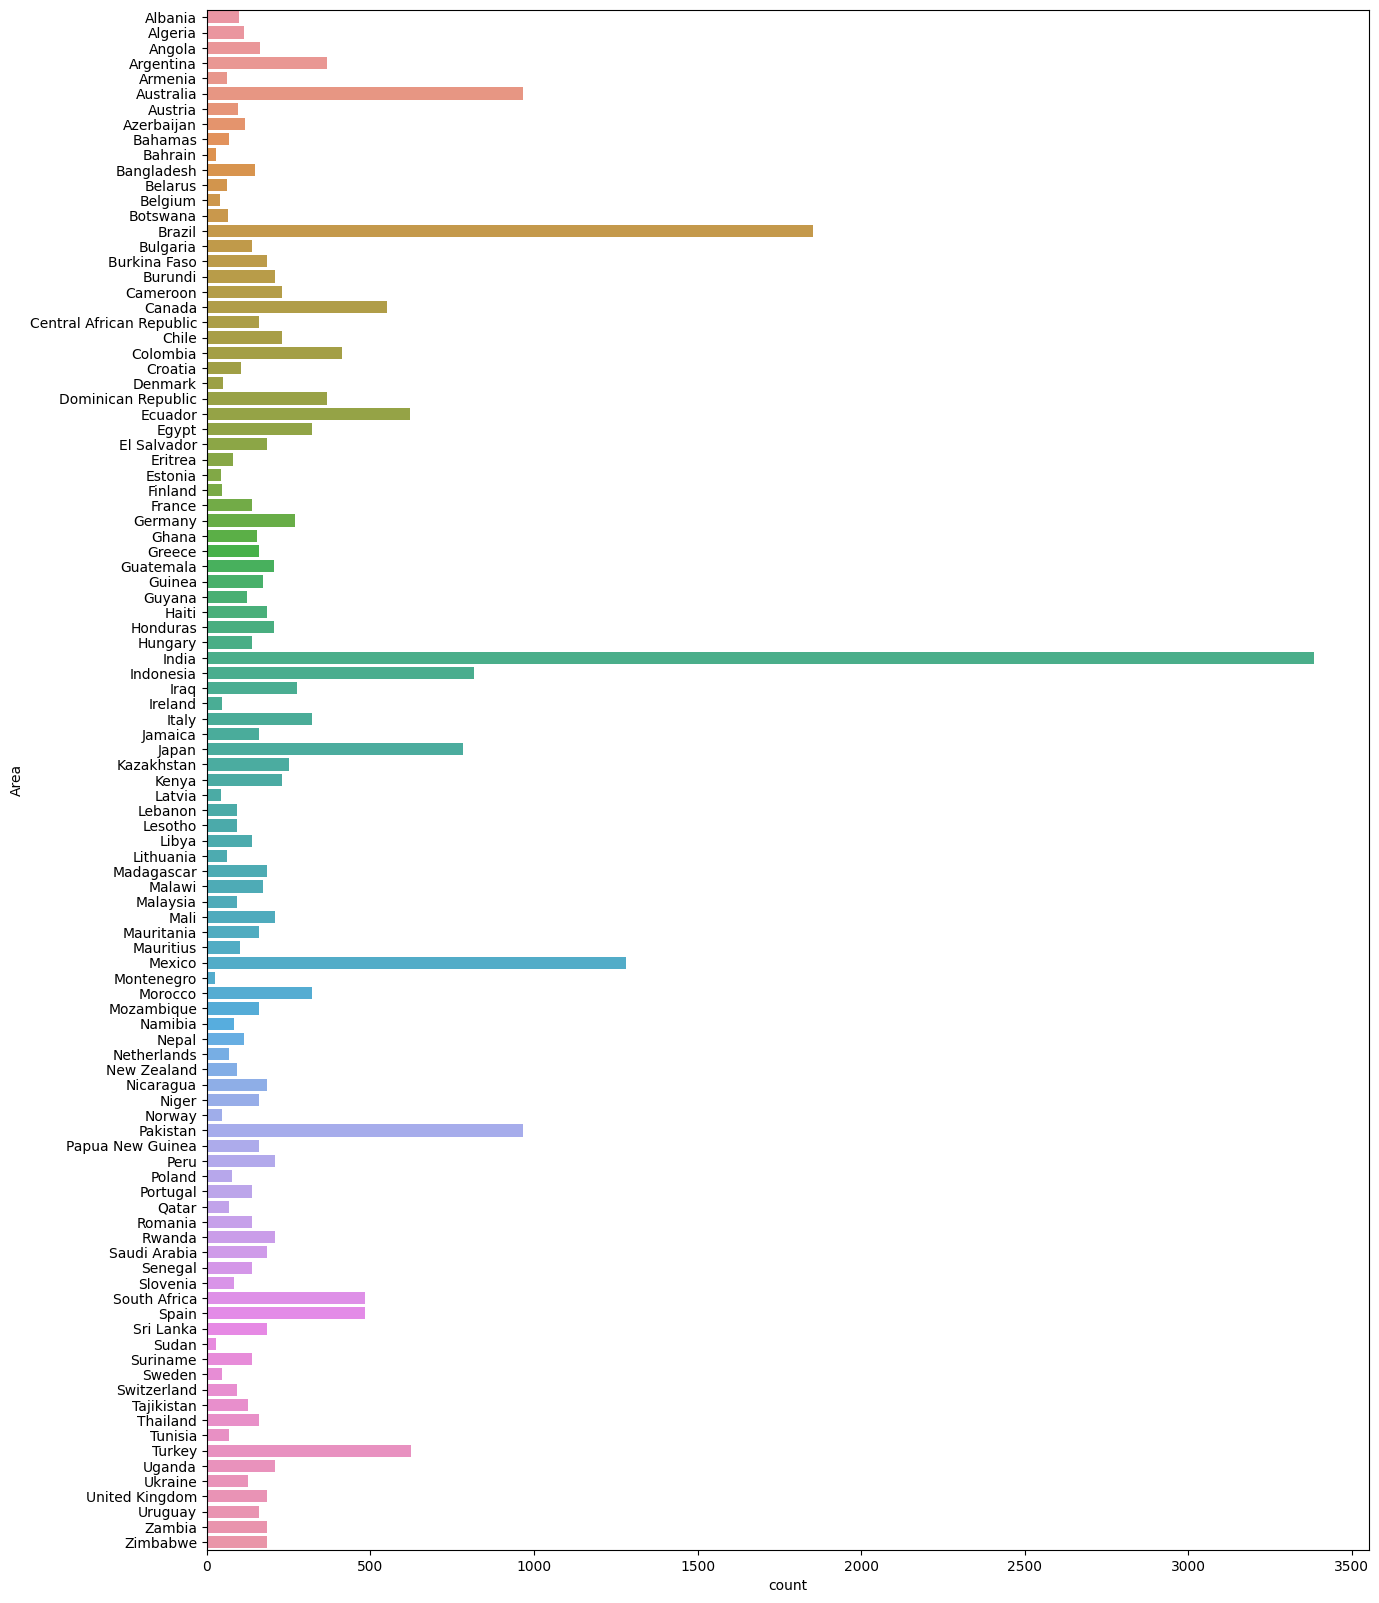

In [12]:
plt.figure(figsize=(15, 20))
sns.countplot(y=df['Area'])

Observation : From above graph we can conclude that india frequency is most and then comes Brazil.

In [13]:
(df['Area'].value_counts() <= 500).sum()

91

Observation: There are more than 91 countries whose frequency in our data is less than 500.

Conclusion: We can take this a deciding factor to convert all 91 countries to one

### Graph Yield vs Area

In [14]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['Yield Value'].sum())

<Axes: >

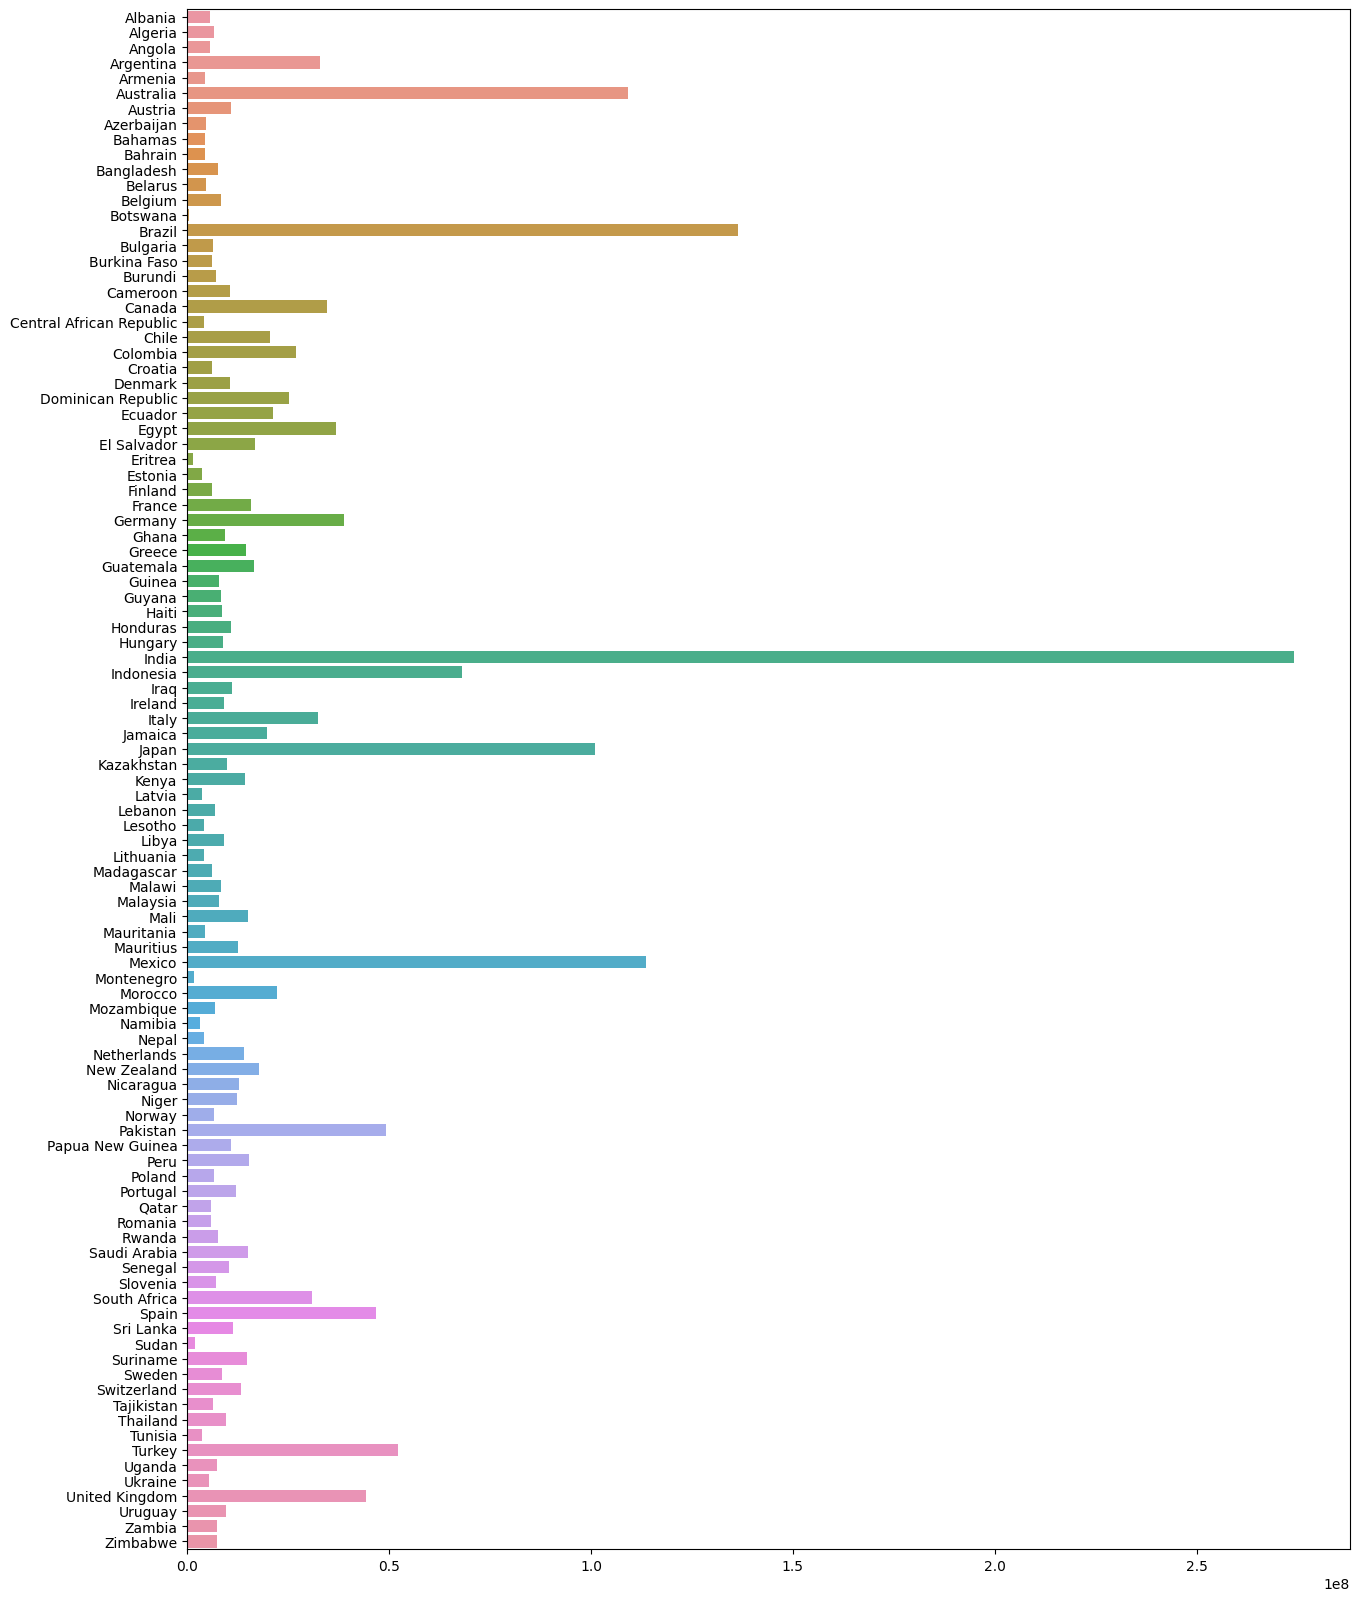

In [15]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

Observation: The frequency graph above almost look same. There are some country whose mention is very low but yield is very high.

In [16]:
(np.array(yield_per_country)<=(3*1e7)).sum()

85

Observation: There are more than 85 countries whose frequency in our data is less than 3*1e7 tonnes.

Conclusion: We can take this a deciding factor to convert all 85 countries to one

### Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

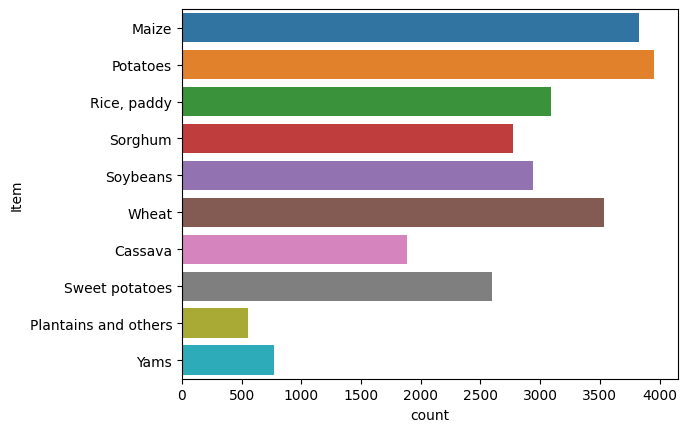

In [17]:
sns.countplot(y=df['Item'])

Observation: Our data contains only 9 different item and one 'other' category as item which hold all the other types of crops that farmer grows.

### Graph Yield vs Item

In [18]:
yield_per_crop = []
crops = df['Item'].unique()
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['Yield Value'].sum())

<Axes: >

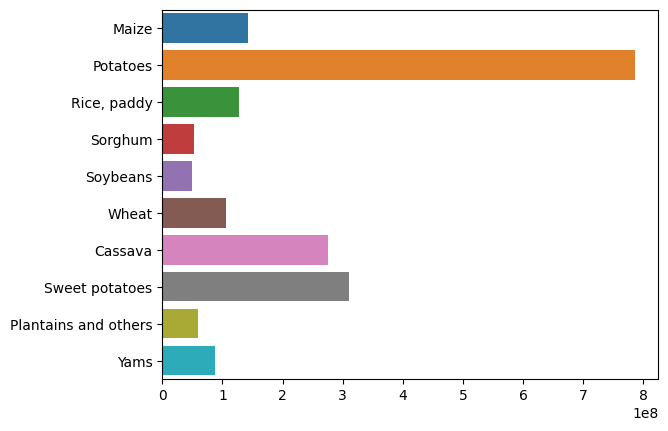

In [19]:
sns.barplot(y=crops, x=yield_per_crop)

### Graph Avg Temp vs Area vs Years

In [20]:
plt.figure(figsize=(15, 655))
sns.barplot(y=df['Area'], x=df['Avg_Temp'], hue=df['Year'])

<Axes: xlabel='Avg_Temp', ylabel='Area'>

Observation: There are many Country missing data of couples of year. That's is fine. But there are two country who misses about 70% and more data about year and it's Average Tempearature missing. Those country are Sudan and Montegero.

Conclusion:- Two way's either remove those data or merge them to represent them as other category. I choose it to keep it.

### Graph Avg Rainfall MM Per Year vs Area vs Years

In [21]:
plt.figure(figsize=(15, 655))
sns.barplot(y=df['Area'], x=df['average_rain_fall_mm_per_year'], hue=df['Year'])

<Axes: xlabel='average_rain_fall_mm_per_year', ylabel='Area'>

Observation: Data Suggest during the year 1990 to 2013 there is no change in average rainfall in every country.

### Graph Pesticides vs Area vs Years

In [22]:
plt.figure(figsize=(15, 655))
sns.barplot(y=df['Area'], x=df['Pesticies Value'], hue=df['Year'])

<Axes: xlabel='Pesticies Value', ylabel='Area'>

Observation: According to the data Brazil uses the pesticides the most. There are many country which uses less pesticides. I think it is because they produce less crops so they require less pesticides to other country. Even though India is top 1 in term of yield but it uses very less pesticides.

## Data Preprocessing

### Rearranging Columns

In [23]:
col = ['Year', 'average_rain_fall_mm_per_year','Pesticies Value', 'Avg_Temp', 'Area', 'Item', 'Yield Value']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X

,Year,average_rain_fall_mm_per_year,Pesticies Value,Avg_Temp,Area,Item
0,1990,1485.0,121.00,16.37,Albania,Maize
1,1990,1485.0,121.00,16.37,Albania,Potatoes
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy"
3,1990,1485.0,121.00,16.37,Albania,Sorghum
4,1990,1485.0,121.00,16.37,Albania,Soybeans
...,...,...,...,...,...,...
28243,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy"
28244,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum
28245,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans
28246,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes


### Splitting Dataset into train and test set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

### Converting Categorical to Numerical and Scaling the values

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [27]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [28]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__Pesticies Value', 'StandardScale__Avg_Temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana', '

In [29]:
X_train_dummy.shape

(20745, 113)

## Let's train our model

In [30]:
def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
modelPerformance = pd.DataFrame(np.zeros((9, 4)), columns=['Algorithm', 'Mean Absolute Error', 'R2 Score', 'Adjusted R2 Score'])

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_dummy, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error
y_pred = linreg.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

29907.491095866055

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7473121319079319

In [36]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.7416835631922993

In [37]:
new_row = pd.Series(['Linear Regression', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[0,:] = new_row

### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
params = {
    'alpha': [0.1, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.7, 2.0, 2.3, 2.6, 3.0, 3.5, 4, 5, 6],
    'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
ridge = GridSearchCV(Ridge(), params, scoring='neg_mean_squared_error', cv=10)
ridge.fit(X_train_dummy, y_train)

/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/home/tipatle/Project/Object_Detection/tfod/lib/p

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.7, 2.0,
                                   2.3, 2.6, 3.0, 3.5, 4, 5, 6],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [39]:
y_pred = ridge.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

29882.72280233382

In [40]:
score = r2_score(y_test, y_pred)
score

0.7473180855464526

In [41]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.7416896494468566

In [42]:
new_row = pd.Series(['Ridge', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[1,:] = new_row

### KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
params = {
    'n_neighbors' : [5, 10, 15],
    'weights' : ['distance', 'uniform'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [-1]
}
kneighbor = GridSearchCV(KNeighborsRegressor(), params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
kneighbor.fit(X_train_dummy, y_train)

/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/tipatle/Project/Object

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1], 'n_neighbors': [5, 10, 15],
                         'weights': ['distance', 'uniform']},
             scoring='neg_mean_squared_error')

In [44]:
y_pred = kneighbor.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

3963.945742371118

In [45]:
score = r2_score(y_test, y_pred)
score 

0.9879590933082053

In [46]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.987690884663188

In [47]:
new_row = pd.Series(['KNN', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[2,:] = new_row

### Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
params = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_features': [None, 'sqrt', 'log2'],
}
dt = GridSearchCV(DecisionTreeRegressor(), params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
dt.fit(X_train_dummy, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [49]:
y_pred = dt.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

3932.5608251397725

In [50]:
score = r2_score(y_test, y_pred)
score 

0.9795049646255505

In [51]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.979048442055609

In [52]:
new_row = pd.Series(['Decision Tree', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[3,:] = new_row

### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
params = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_features': [None, 'sqrt', 'log2'],
    'n_jobs' : [-1],
    'bootstrap' : [True, False],
    'min_impurity_decrease' : [0.0, 0.2, 0.5, 0.7],
    'min_samples_split' : [2, 4, 6, 9]
}
rf = RandomForestRegressor()
rf.fit(X_train_dummy, y_train)

RandomForestRegressor()

In [54]:
y_pred = rf.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

3684.4216714864083

In [55]:
score = r2_score(y_test, y_pred)
score

0.9876592520897951

In [56]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.9873843645451759

In [57]:
new_row = pd.Series(['Random Forest', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[4,:] = new_row

In [58]:
kneighbor.best_params_

{'algorithm': 'ball_tree',
 'n_jobs': -1,
 'n_neighbors': 5,
 'weights': 'distance'}

### Voting Ensemble

In [59]:
from sklearn.ensemble import VotingRegressor
models = [['rf', RandomForestRegressor()], 
          ['knn1', KNeighborsRegressor(
              algorithm='kd_tree', 
              n_jobs= -1, 
              n_neighbors=5, 
              weights='distance'
          )]]
vr = VotingRegressor(models, n_jobs=-1)
vr.fit(X_train_dummy, y_train)

/home/tipatle/Project/Object_Detection/tfod/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


VotingRegressor(estimators=[['rf', RandomForestRegressor()],
                            ['knn1',
                             KNeighborsRegressor(algorithm='kd_tree', n_jobs=-1,
                                                 weights='distance')]],
                n_jobs=-1)

In [60]:
y_pred = vr.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

3646.5360148134955

In [61]:
score = r2_score(y_test, y_pred)
score

0.9894504927456444

In [62]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.9892155047070593

In [63]:
new_row = pd.Series(['Voting Ensemble', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[5,:] = new_row

### Bagging Regressor

In [64]:
from sklearn.ensemble import BaggingRegressor
params = {
    'estimator' : [KNeighborsRegressor(), LinearRegression()],
    'n_estimators' : [10, 20],
    'max_samples' : [0.6, 0.8, 1.0],
    'max_features': [0.6, 1.0],
    'n_jobs' : [-1]
}
bg = GridSearchCV(BaggingRegressor(), params, scoring = 'neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
bg.fit(X_train_dummy, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'estimator': [KNeighborsRegressor(),
                                       LinearRegression()],
                         'max_features': [0.6, 1.0],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [10, 20], 'n_jobs': [-1]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
y_pred = bg.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

4957.399602853287

In [66]:
score = r2_score(y_test, y_pred)
score

0.9840466484203437

In [67]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.9836912908945206

In [68]:
new_row = pd.Series(['Bagging', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[6,:] = new_row

### Gradient Boost

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : [0.1, 0.4, 0.6, 0.8, 1, 1.3],
    'n_estimators' : [100, 200],
    'max_features' : [None, 'sqrt', 'log2'],
}
gb = GridSearchCV(GradientBoostingRegressor(), params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
gb.fit(X_train_dummy, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.4, 0.6, 0.8, 1, 1.3],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [70]:
y_pred = gb.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

10484.77767817196

In [71]:
score = r2_score(y_test, y_pred)
score

0.9602293751259776

In [72]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.9593434928845496

In [73]:
new_row = pd.Series(['Gradient Boosting', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[7,:] = new_row

### Stacking Regressor

In [74]:
from sklearn.ensemble import StackingRegressor
estimator =  [('rf', RandomForestRegressor()), ('kneighbor', KNeighborsRegressor())]
sr = StackingRegressor(estimators = estimator, final_estimator=RandomForestRegressor(), n_jobs=-1)
sr.fit(X_train_dummy, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('kneighbor', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [75]:
y_pred = sr.predict(X_test_dummy)
error = mean_absolute_error(y_test, y_pred)
error

4326.937603624446

In [76]:
score = r2_score(y_test, y_pred)
score

0.9873027230913031

In [77]:
n=X_test_dummy.shape[0]
k=X_test_dummy.shape[1]
adj_score = adjusted_r2_score(y_test, y_pred, n, k)
adj_score

0.9870198939387932

In [78]:
new_row = pd.Series(['Stacking', error, score, adj_score], index=modelPerformance.columns)
modelPerformance.iloc[8,:] = new_row

In [79]:
modelPerformance.sort_values(['Mean Absolute Error'],axis=0, ignore_index=True)

,Algorithm,Mean Absolute Error,R2 Score,Adjusted R2 Score
0,Voting Ensemble,3646.536015,0.989450,0.989216
1,Random Forest,3684.421671,0.987659,0.987384
2,Decision Tree,3932.560825,0.979505,0.979048
3,KNN,3963.945742,0.987959,0.987691
4,Stacking,4326.937604,0.987303,0.987020
5,Bagging,4957.399603,0.984047,0.983691
6,Gradient Boosting,10484.777678,0.960229,0.959343
7,Ridge,29882.722802,0.747318,0.741690
8,Linear Regression,29907.491096,0.747312,0.741684


There are 6 models with an MAE error of less than 5000 units, indicating their strong performance. 

1. Generally, the Random Forest model is preferred due to its strong generalization and performance, allowing for efficient prediction on new data.
2. However, the Voting Ensemble model may take longer to perform predictions on new data.
3. The Gradient Boosting model is currently not performing well, suggesting the need for hyperparameter tuning to optimize its performance.
4. The XG Boost model has not been utilized thus far. By incorporating it and properly hyperparameter tuning the model, we can expect significant improvements.

### Saving Model

In [80]:
import pickle
with open('/home/tipatle/Project/Crop Yield Prediction/Model/RadomForest.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [81]:
with open('/home/tipatle/Project/Crop Yield Prediction/Model/VotingEnsemble.pkl', 'wb') as file:
    pickle.dump(vr, file)

In [82]:
with open('/home/tipatle/Project/Crop Yield Prediction/Model/KNN.pkl', 'wb') as file:
    pickle.dump(kneighbor, file)

In [83]:
with open('/home/tipatle/Project/Crop Yield Prediction/Model/Stacking.pkl', 'wb') as file:
    pickle.dump(sr, file)

In [84]:
with open('/home/tipatle/Project/Crop Yield Prediction/Model/pipeline.pkl', 'wb') as file:
    pickle.dump(preprocesser, file)